In [35]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [36]:
data = pd.read_csv('sample.csv')

In [37]:
data.drop(['A'],axis=1,inplace=True)

In [38]:
features = data.columns.drop('TARGET')
features

Index(['B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M'], dtype='object')

In [39]:
data[features].min()

B    -1.49
C    61.26
D    -0.75
E    -0.03
F     0.06
G     1.23
H    -0.02
I    35.59
J     0.23
K     1.30
L    -4.84
M   -58.86
dtype: float64

In [40]:
data = data[(data[features] >= 0).all(axis=1)]


In [41]:
data[features].min()

B     0.00
C    61.26
D     0.00
E     0.00
F     0.06
G     1.23
H     0.00
I    35.59
J     0.23
K     1.30
L     0.08
M     8.34
dtype: float64

In [42]:
# data['TARGET'] = data['TARGET'].shift(-70)
# # print(data.isnull().any())
# data.dropna(inplace=True)
# data.isnull().any()

Outliers

In [43]:
outlier_mask = None

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

for i in features:
    outliers = (data[i] > upper_bound[i]) | (data[i] < lower_bound[i])

    if outliers.any():
        print(f"{i} - {len(data[outliers])} Outliers found")
        print(f"Upper Bound: {upper_bound[i]} Lower Bound: {lower_bound[i]}")
        # print(tabulate(data_positive[outliers].head(), headers='keys', tablefmt="fancy_grid", showindex=False))
    else:
        print(f"{i} - No outliers")
    
    if outlier_mask is None:
        outlier_mask = outliers
    else:
        outlier_mask |= outliers

print("\nRemoving Outliers...")
data = data[~outlier_mask]
print(len(data))


B - 12803 Outliers found
Upper Bound: 73.13 Lower Bound: 2.890000000000004
C - 5330 Outliers found
Upper Bound: 86.91499999999999 Lower Bound: 70.23499999999999
D - 12613 Outliers found
Upper Bound: 46.85000000000001 Lower Bound: 1.3299999999999947
E - 12202 Outliers found
Upper Bound: 245.83499999999998 Lower Bound: 57.55500000000001
F - 14051 Outliers found
Upper Bound: 600.2312499999999 Lower Bound: 250.5212500000001
G - 903 Outliers found
Upper Bound: 1.34 Lower Bound: 1.26
H - 13972 Outliers found
Upper Bound: 518.2462499999999 Lower Bound: 263.61625000000004
I - 5428 Outliers found
Upper Bound: 85.115 Lower Bound: 70.355
J - 11960 Outliers found
Upper Bound: 169.615 Lower Bound: 2.214999999999982
K - 5354 Outliers found
Upper Bound: 1.5150000000000001 Lower Bound: 1.395
L - 18572 Outliers found
Upper Bound: 415.11625000000004 Lower Bound: 262.16625
M - 5214 Outliers found
Upper Bound: 29.515 Lower Bound: 17.474999999999994

Removing Outliers...
70095


In [44]:
# data = data.groupby(data.index//60).mean()
# print("No. of Instances:", len(data))

In [45]:
X = data.drop('TARGET',axis=1)
y = data['TARGET']

In [46]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [47]:
X_train, X_test ,y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [48]:
def acc_score(y_true, y_pred,x):
    if(len(y_true)!=len(y_pred)):
        print("Invalid Size")
    else:
        correct = 0
        for i in range(len(y_true)):
            if(((y_true[i]+x)>=y_pred[i]) and ((y_true[i]-x)<=y_pred[i])):
                correct += 1
    return (correct/len(y_true))*100

In [15]:
model = LinearRegression()
model.fit(X_train, y_train) 

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)

print("Mean Squared Error: ", mse)
print("R_squared score:", r2)
print("Accuracy: ",acc_score(y_test.values,y_pred,0.1))

Mean Squared Error:  0.09243242013537285
R_squared score: 0.10543948196659436
Accuracy:  28.846565375561738


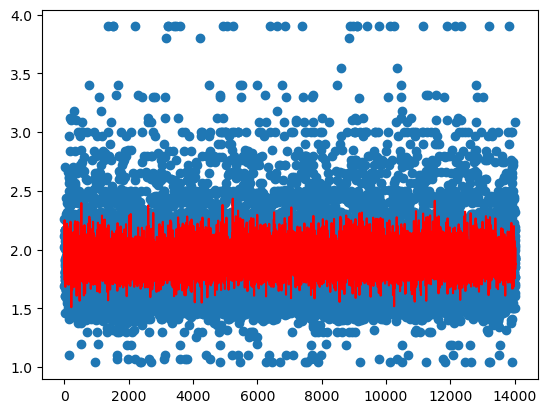

In [16]:
import matplotlib.pyplot as plt
plt.scatter(range(len(y_pred)),y_test.values)
plt.plot(range(len(y_pred)),y_pred,color="red")
plt.show()

In [17]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)
print("Accuracy: ",acc_score(y_test.values,y_pred,0.1))

Mean Squared Error: 0.010551396409158996
R^2 Score: 0.8978836362400844
Accuracy:  85.83351166274342


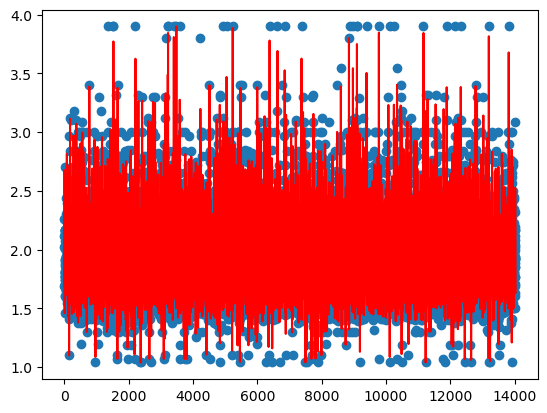

In [18]:
plt.scatter(range(len(y_pred)),y_test.values)
plt.plot(range(len(y_pred)),y_pred,color="red")
plt.show()

In [19]:
import xgboost as xgb
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 10, alpha = 5, n_estimators = 100)

# Train the model
xg_reg.fit(X_train, y_train)

pred = xg_reg.predict(X_test)

loss = mean_squared_error(y_test, pred)
print("MSE LOSS: ", loss)
r2 = r2_score(y_test, pred)
print("R2 Score:", r2 * 100, "%")
print("Accuracy: ", acc_score(y_test.values, pred, 0.1), "%")

MSE LOSS:  0.025899530676750833
R2 Score: 74.93444665293374 %
Accuracy:  57.8999928668236 %


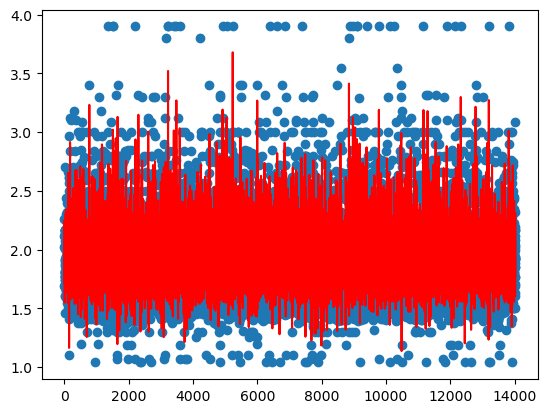

In [20]:
plt.scatter(range(len(pred)),y_test.values)
plt.plot(range(len(pred)),pred,color="red")
plt.show()

In [21]:
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor(max_depth=10, random_state=42)
dt_reg.fit(X_train, y_train)

y_pred = dt_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.4f}')
print(f'R-squared: {r2:.4f}')
print(f'Accuracy: {acc_score(y_test.values,y_pred,0.05)}')

Mean Squared Error: 0.0607
R-squared: 0.4126
Accuracy: 25.222911762607893


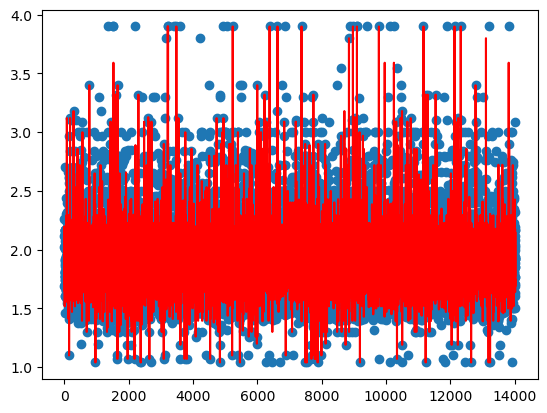

In [22]:
plt.scatter(range(len(y_pred)),y_test.values)
plt.plot(range(len(y_pred)),y_pred,color="red")
plt.show()

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation='linear'))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

Early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

history = model.fit(X_train, y_train, 
                    epochs=100, 
                    batch_size=32, 
                    validation_split=0.2, 
                    callbacks=[Early_stopping, reduce_lr])

y_pred = model.predict(X_test).flatten()

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.4f}')
print(f'R-squared: {r2:.4f}')
print(f'Accuracy: {acc_score(y_test.values,y_pred,0.05)}')




Epoch 1/100


1402/1402 [==============================] - 11s 6ms/step - loss: 0.1350 - mae: 0.2628 - val_loss: 0.0760 - val_mae: 0.1985 - lr: 0.0010
Epoch 2/100
1402/1402 [==============================] - 7s 5ms/step - loss: 0.0735 - mae: 0.1996 - val_loss: 0.0688 - val_mae: 0.1862 - lr: 0.0010
Epoch 3/100
1402/1402 [==============================] - 7s 5ms/step - loss: 0.0660 - mae: 0.1901 - val_loss: 0.0587 - val_mae: 0.1797 - lr: 0.0010
Epoch 4/100
1402/1402 [==============================] - 7s 5ms/step - loss: 0.0601 - mae: 0.1807 - val_loss: 0.0516 - val_mae: 0.1665 - lr: 0.0010
Epoch 5/100
1402/1402 [==============================] - 8s 5ms/step - loss: 0.0540 - mae: 0.1723 - val_loss: 0.0484 - val_mae: 0.1599 - lr: 0.0010
Epoch 6/100
1402/1402 [==============================] - 8s 6ms/step - loss: 0.0502 - mae: 0.1662 - val_loss: 0.0477 - val_mae: 0.1560 - lr: 0.0010
Epoch 7/100
1402/1402 [==============================] - 8s 6ms/step - loss: 0.0468 - mae: 0.1607 - val_lo

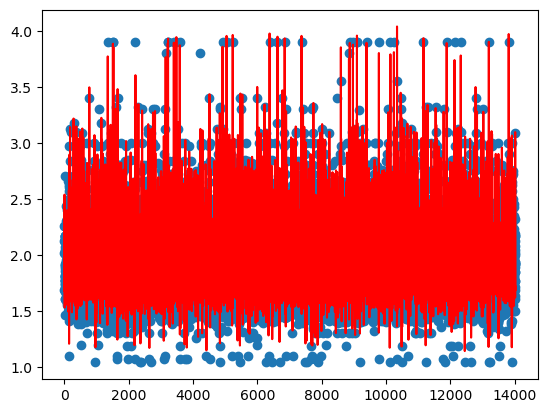

In [24]:
plt.scatter(range(len(y_pred)),y_test.values)
plt.plot(range(len(y_pred)),y_pred,color="red")
plt.show()

In [25]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_rf_pred_train = rf.predict(X_train)
y_rf_pred_test = rf.predict(X_test)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_rf_pred_train)

y_pred = lin_reg.predict(X_test)
r2 = r2_score(y_rf_pred_test, y_pred)

y_pred = model.predict(X_test).flatten()

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.4f}')
print(f'R-squared: {r2:.4f}')
print(f'Accuracy: {acc_score(y_test.values,y_pred,0.05)}')

439/439 [==============================] - 1s 2ms/step
Mean Squared Error: 0.0093
R-squared: 0.9100
Accuracy: 54.889792424566664


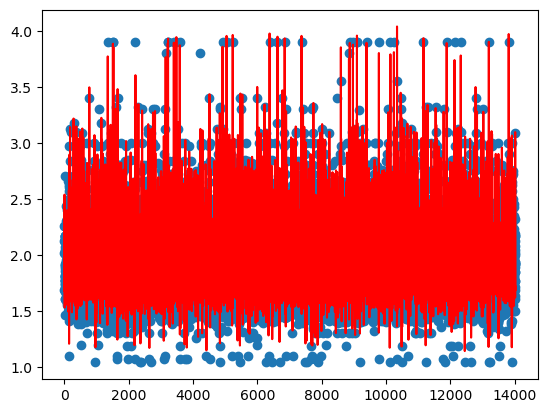

In [26]:
plt.scatter(range(len(y_pred)),y_test.values)
plt.plot(range(len(y_pred)),y_pred,color="red")
plt.show()

In [27]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

base_estimator = LinearRegression()

adaboost_model = AdaBoostRegressor(base_estimator=base_estimator, random_state=0)
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1]}

grid_search = GridSearchCV(adaboost_model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.4f}')
print(f'R-squared: {r2:.4f}')
print(f'Accuracy: {acc_score(y_test.values,y_pred,0.05)}')

c:\Users\ravik\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\ravik\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Mean Squared Error: 0.0925
R-squared: 0.1051
Accuracy: 15.008203152863969


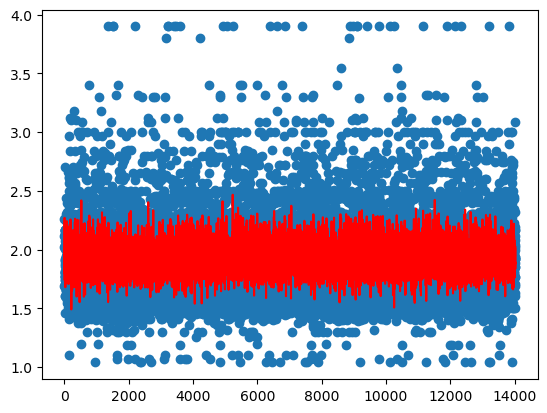

In [28]:
plt.scatter(range(len(y_pred)),y_test.values)
plt.plot(range(len(y_pred)),y_pred,color="red")
plt.show()

In [49]:
from sklearn.linear_model import LassoLarsIC

lasso_lars_ic = LassoLarsIC(criterion='aic')
lasso_lars_ic.fit(X_train, y_train)
y_pred = lasso_lars_ic.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.4f}')
print(f'R-squared: {r2:.4f}')
print(f'Accuracy: {acc_score(y_test.values,y_pred,0.05)}')

Mean Squared Error: 0.0924
R-squared: 0.1054
Accuracy: 15.129467151722661


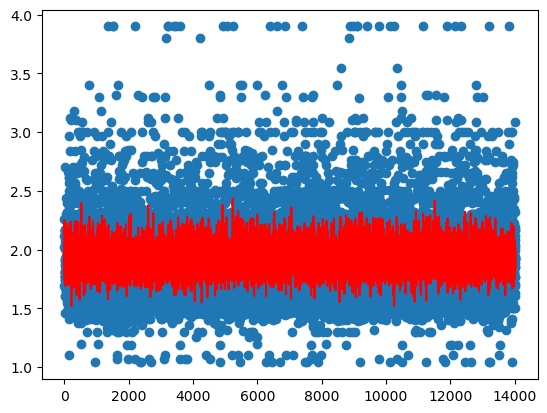

In [50]:
plt.scatter(range(len(y_pred)),y_test.values)
plt.plot(range(len(y_pred)),y_pred,color="red")
plt.show()

In [51]:
print("Coeffs: ",lasso_lars_ic.coef_)
print("Intercept: ",lasso_lars_ic.intercept_)

Coeffs:  [ 0.18511384 -0.02970961 -0.26702888 -0.00598028 -0.04959597  0.03485383
  0.          0.05052022  0.06368541 -0.03209328 -0.01031917 -0.00870103]
Intercept:  1.9226179476502536
